In [113]:
import cv2 as cv
from matplotlib import pyplot as plt

### Метод для зручного порівняння зображень

In [114]:
img_path = 'images/black-white.jpg'
images, titles = [], []

def print2x2(images, titles):
    plt.figure(figsize=(9,6))
    for i, img in enumerate(images):
        plt.subplot(2, 2, i+1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')

### Варіант 1

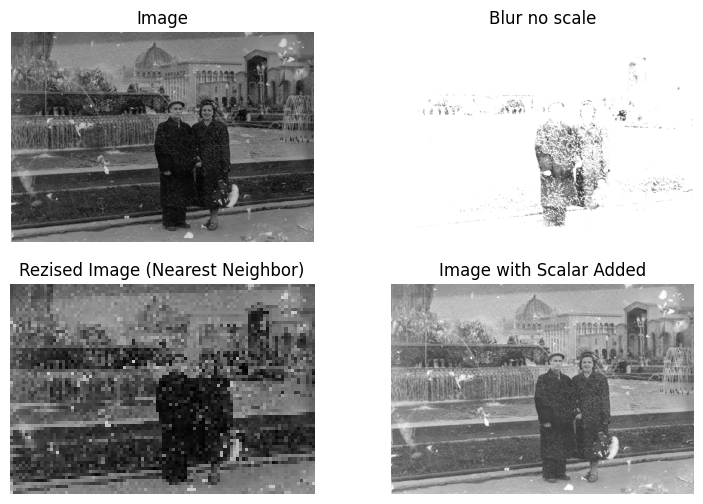

In [115]:
image = cv.imread(img_path)

# Використовуємо фільтер 2х2 без нормалізації
blur_no_scale = cv.boxFilter(image, ddepth=-1, ksize=(3, 3), normalize=False)

# Змінюємо розмір зображення
height, width = image.shape[:2] 
resized_image = cv.resize(image, (width//10, height//10), interpolation=cv.INTER_NEAREST)

# Додаємо до кожного пікселя задане значення
scalar_value = 50
image_with_scalar = cv.add(image, scalar_value)

images = [image, blur_no_scale, resized_image, image_with_scalar]
titles = ["Image", "Blur no scale", "Rezised Image (Nearest Neighbor)", 'Image with Scalar Added']
print2x2(images, titles)

Як можемо побачити коли ми використовуємо зглажування без нормалізація навіть при використанні фільтру 3х3 зображення стає набагато яскравішим через відсутність нормалізації. В другому випадку використовуэмо найближчу інтерполяцію, яка просто копіює значення найближчого пікселя без згладжуваня чи усереднення. В третьому випадку просто додажемо скалярну величину до кожного пікселя.

### Варіант 2

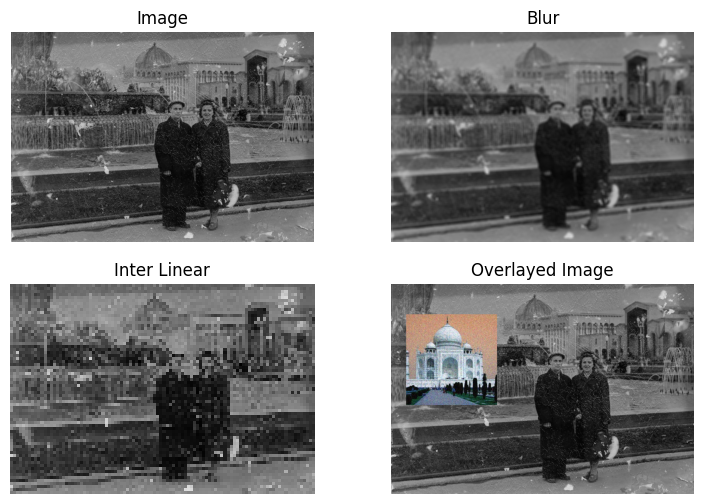

In [116]:
image = cv.imread(img_path)
overlay_image = cv.imread('images/noise.jpg')

# Використовуємо фільтер 2х2 з нормалізацією
blur = cv.boxFilter(image, ddepth=-1, ksize=(10, 10), normalize=True)

# Змінюємо розмір зображення та використовуэмо білінійну інтерполяцію 
height, width = image.shape[:2] 
inter_linear = cv.resize(image, (width//10, height//10), interpolation=cv.INTER_LINEAR)

# Вставляємо іншу картинку
x_offset, y_offset = 100, 50 # Відступи
overlay_height, overlay_width = overlay_image.shape[:2] # Отримуємо розміри
image_with_overlayed = cv.imread(img_path) 
# Перевіряємо чи не виходе зображення за межі
if x_offset + overlay_height <= image_with_overlayed.shape[0] and y_offset + overlay_width <= image_with_overlayed.shape[1]:
    image_with_overlayed[x_offset:overlay_height+x_offset, y_offset:overlay_width+y_offset] = overlay_image

images = [image, blur, inter_linear, image_with_overlayed]
titles = ["Image", "Blur", "Inter Linear", 'Overlayed Image']
print2x2(images, titles)

Як можна побачити тепер коли використовуємо зглажування з нормалізацією при використання фільтру 10х10 зображення стає розмитим. Також коли використовуємо білінійну інтерполяцію при зменшенні розміру фотографії границі обєктів стають чіткішими

### Варіант 3

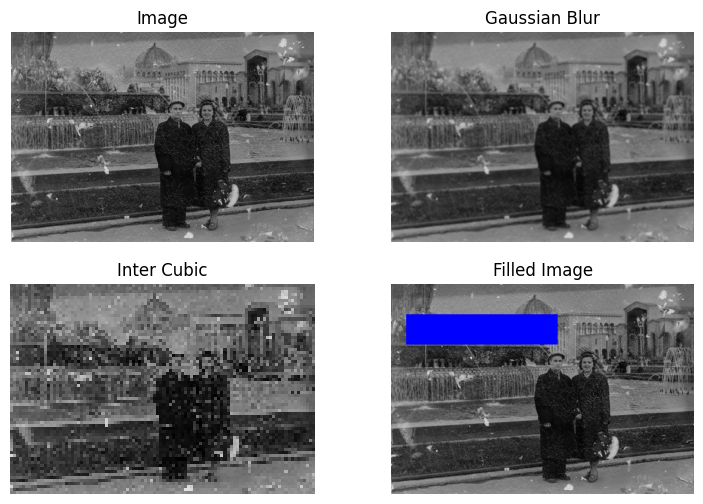

In [117]:
image = cv.imread(img_path)
filled_image = cv.imread(img_path)

gaussian_blur = cv.GaussianBlur(image, (11, 11), 0)

height, width = image.shape[:2] 
inter_cubic = cv.resize(image, (width//10, height//10), interpolation=cv.INTER_CUBIC)

x_offset, y_offset = 100, 50 # Відступи
color_height, color_width = 100, 500 # Розміри
# Перевіряємо чи не виходе зображення за межі
if x_offset + color_height <= image.shape[0] and y_offset + color_width <= image.shape[1]:
    filled_image[x_offset:color_height+x_offset, y_offset:color_width+y_offset] = (0,0,255)

images = [image, gaussian_blur, inter_cubic, filled_image]
titles = ["Image", "Gaussian Blur", "Inter Cubic", 'Filled Image']
print2x2(images, titles)

Можна побачити що гауссове розмиття плавніше і краще для збереження деталей і видалення шуму, на відмінну від простого усереднення. Можна побачити що кубічна інтерполяція запезбепечує вищу якість, але є повільнішую за білінійну інтерполяцію